<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>
<h1> Setup and Context</h1>


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task we will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 35.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [ ]:
df = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

**We can find out the following**

* What is the shape of `data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df.shape

(506, 14)

In [ ]:
df.isna().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
df.duplicated().values.any()

False

## Descriptive Statistics

**We can find out**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Visualise the Features

Having looked at some descriptive statistics,user can visualise the data for your model in the following ways:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 
  

#### House Prices 💰

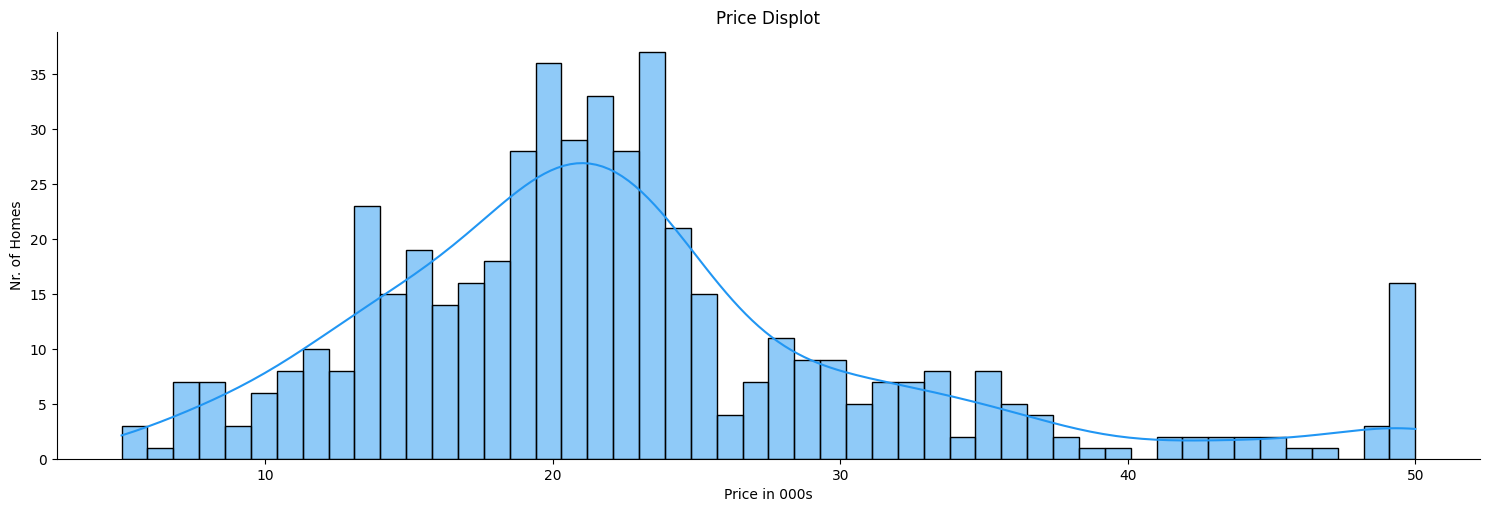

In [ ]:
sns.displot(df.PRICE,
            bins=50,
            kde=True,
            aspect=3,
            color='#2196f3')
plt.title('Price Displot')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')
plt.show()

#### Distance to Employment - Length of Commute 🚗

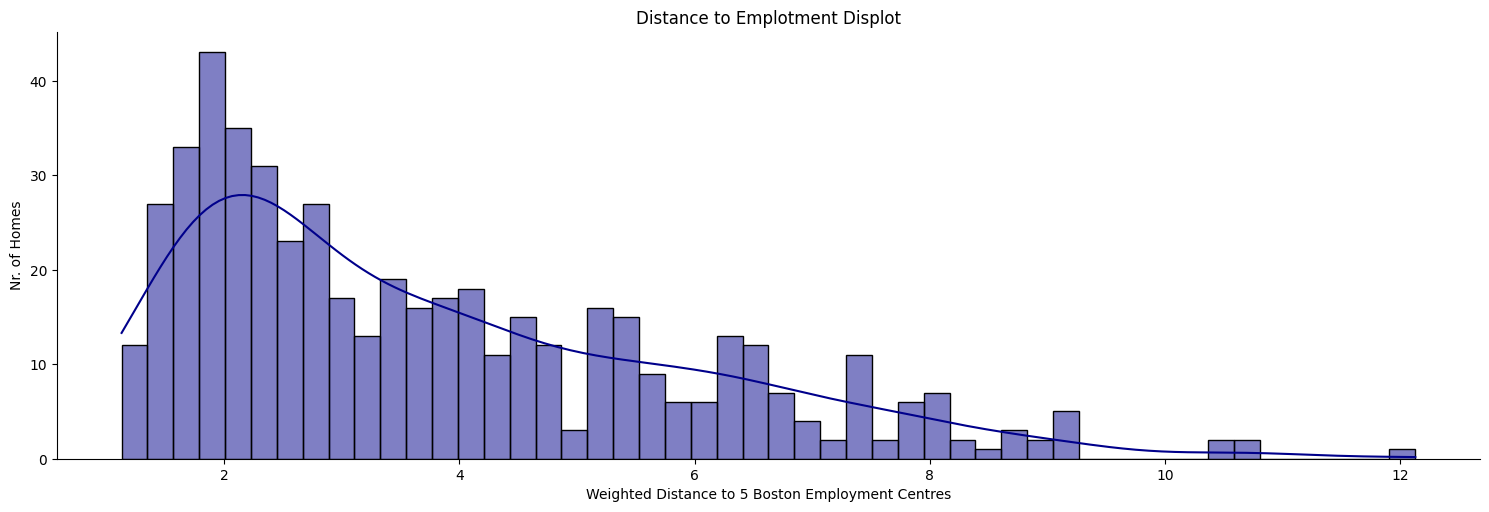

In [ ]:
sns.displot(df.DIS,
            kde=True,
            bins=50,
            color='darkblue',
            aspect=3)
plt.title('Distance to Emplotment Displot')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')
plt.show()

#### Number of Rooms

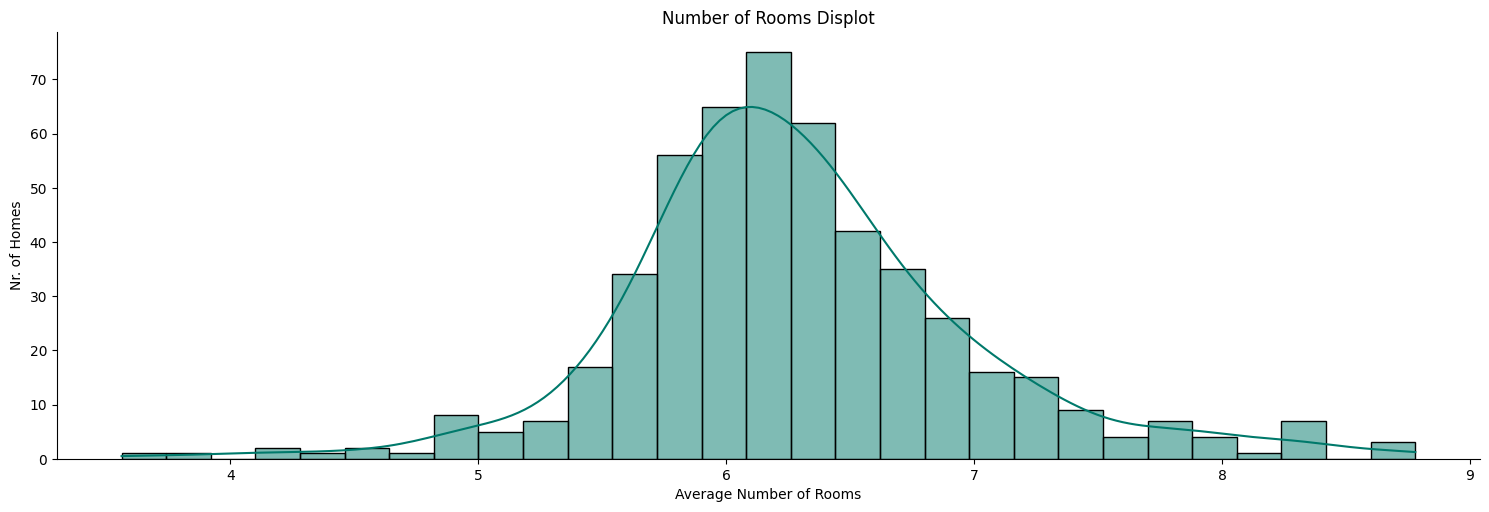

In [ ]:
sns.displot(df.RM,
            kde=True,
            aspect=3,
            color='#00796b')
plt.title('Number of Rooms Displot')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')
plt.show()

#### Access to Highways 🛣

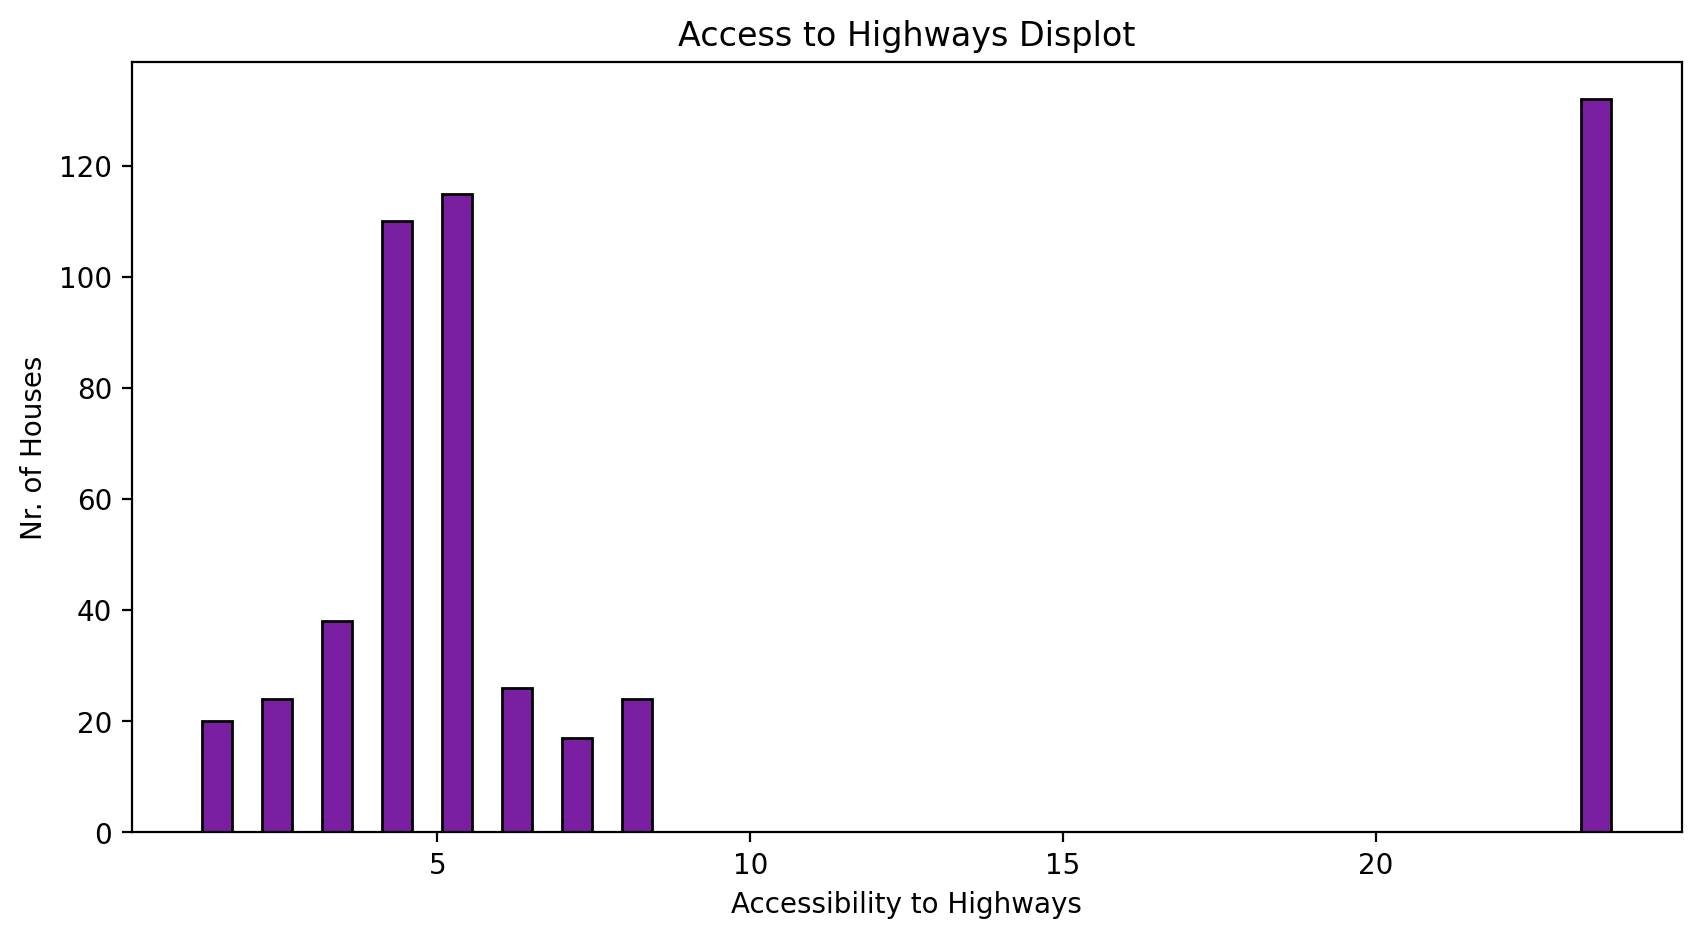

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(df.RAD, 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)


plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.title('Access to Highways Displot')
plt.show()





#### Next to the River? ⛵️

CHAS FUNCTION

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

In [ ]:
river_near = df.CHAS.value_counts()

CHAS_bar = px.bar(x=['No', 'Yes'],
             y=river_near.values,
             color=river_near.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to River')

CHAS_bar.update_layout(xaxis_title='Next to the River', 
                  yaxis_title='Homes',
                  coloraxis_showscale=False)
CHAS_bar.show()

# Understanding the Relationships in the Data

### Running Pair Plot

There might be some relationships in the data that the user should know about. Before they can make some predictions:

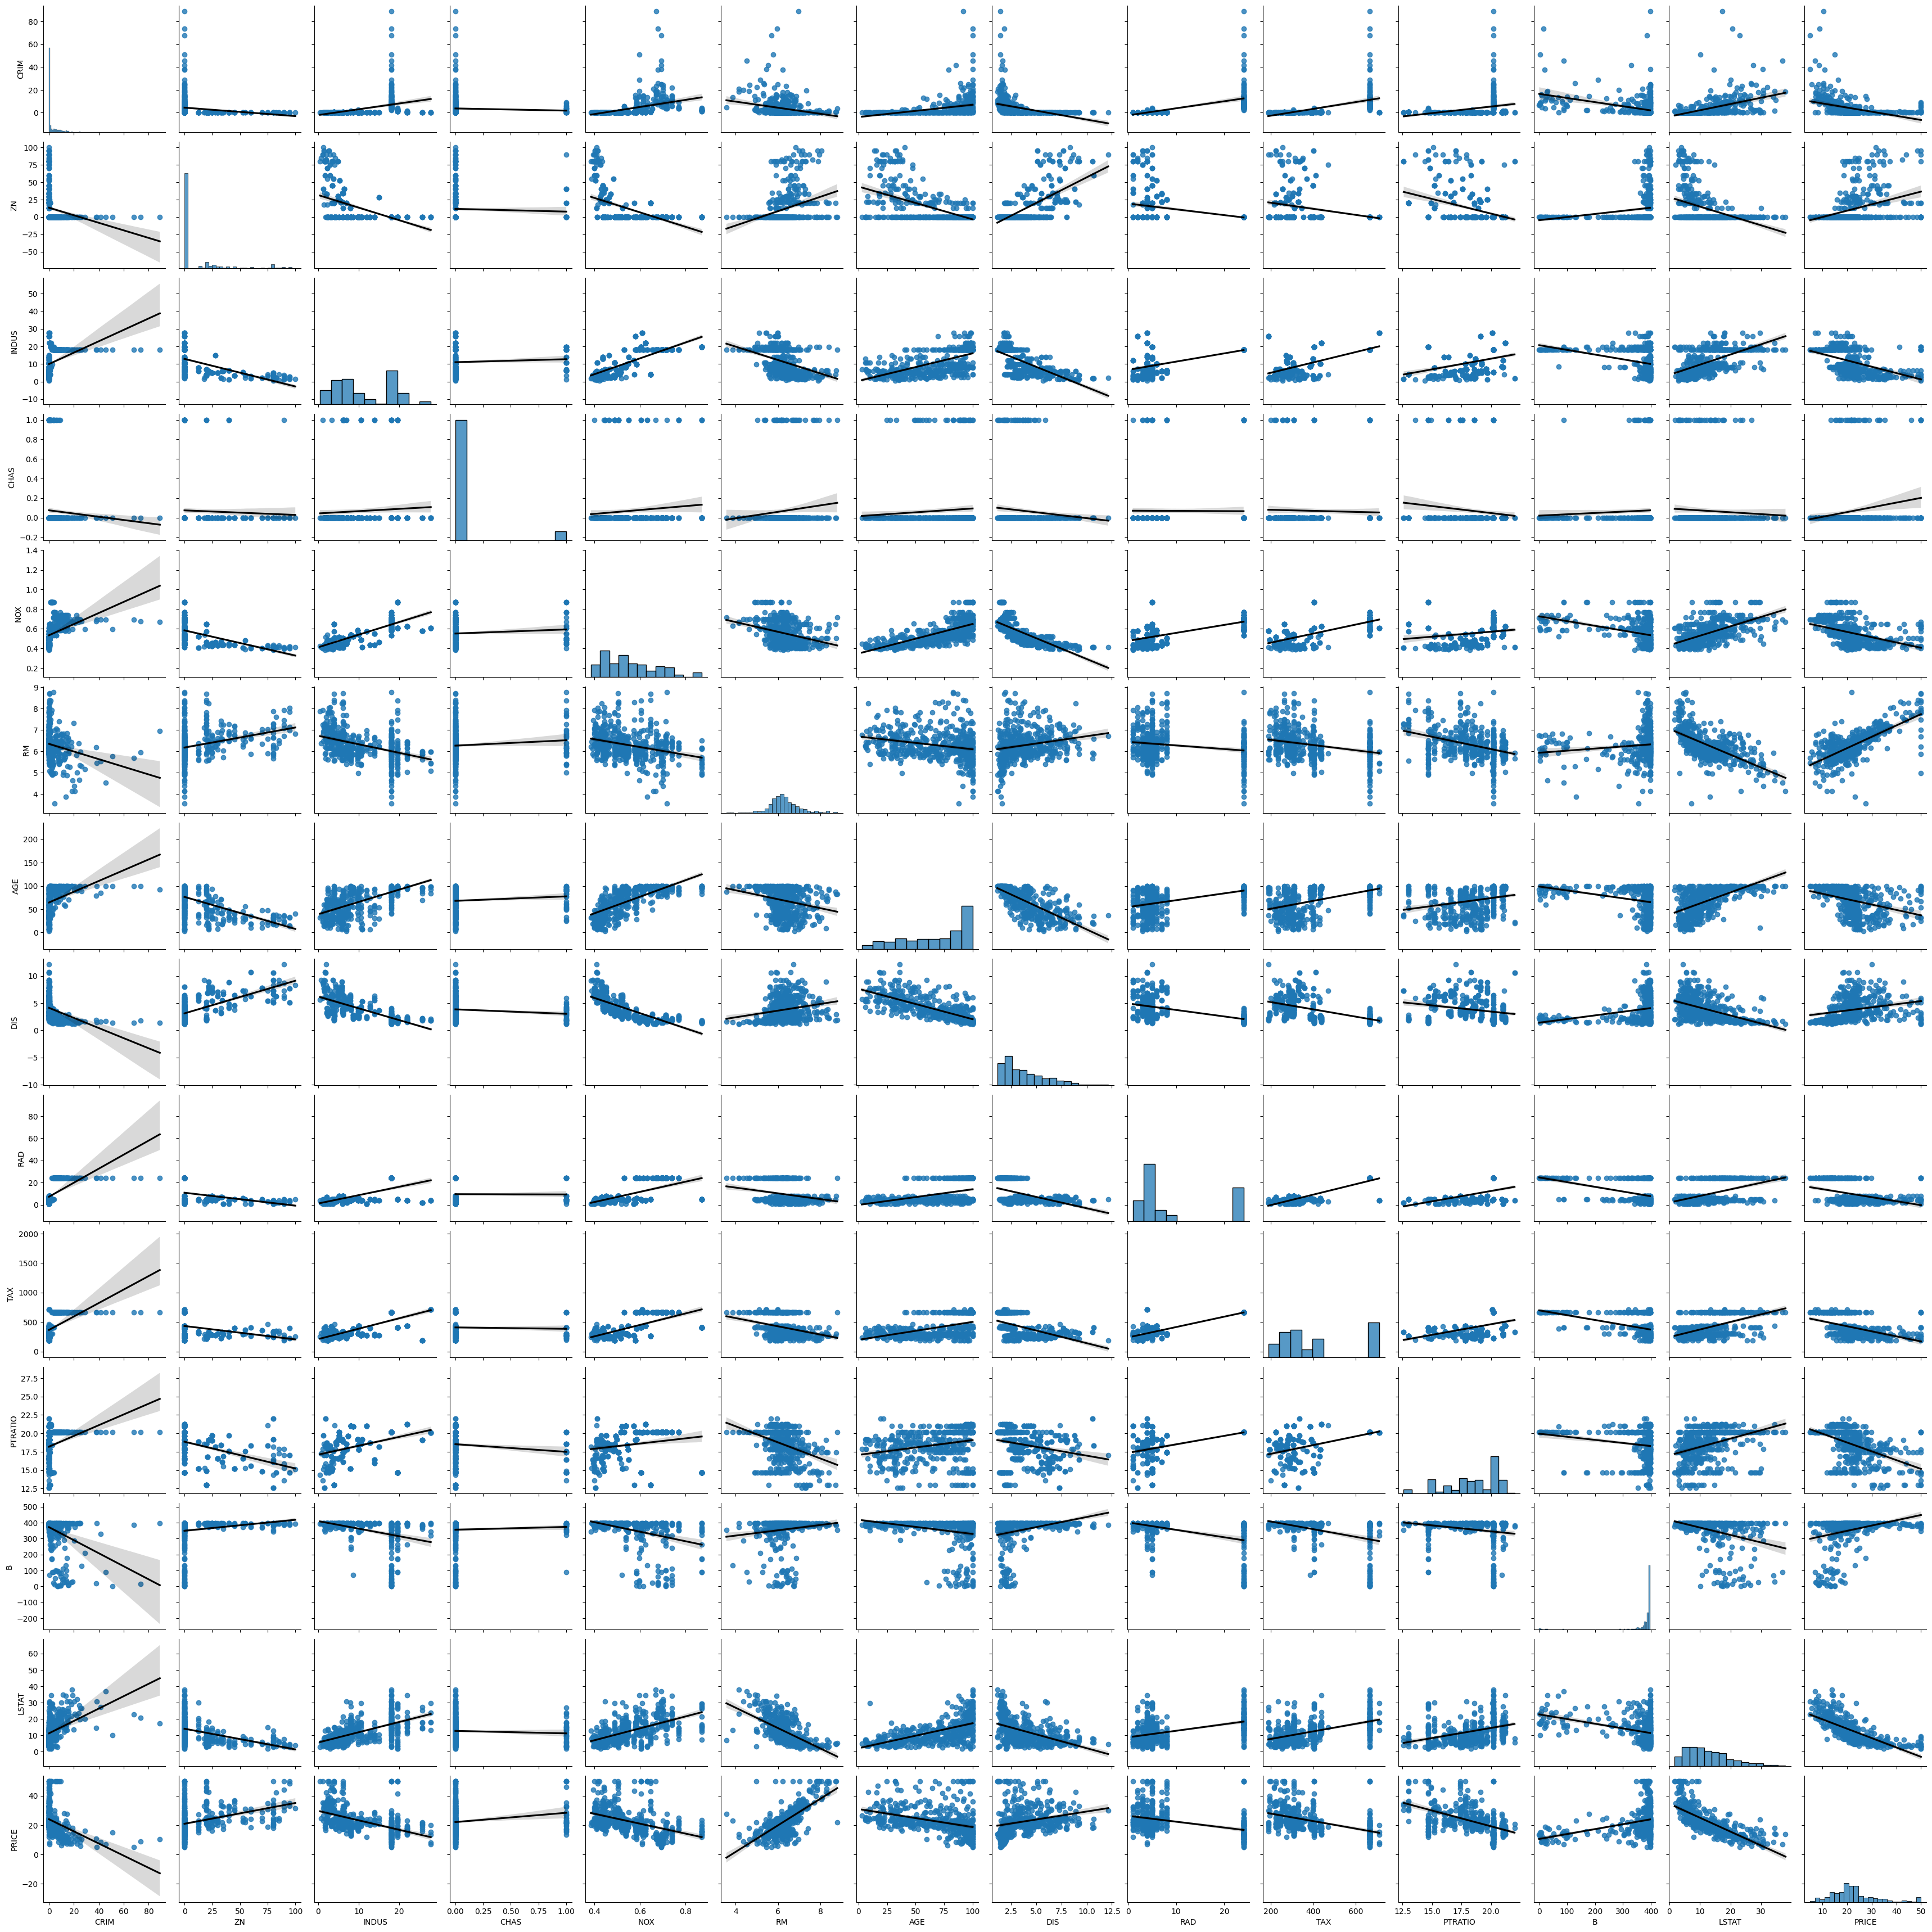

In [ ]:
sns.pairplot(df, kind='reg',plot_kws={'line_kws': {'color': 'black'}})
plt.show()

#### Distance from Employment vs. Pollution

Compareing DIS (Distance from employment) with NOX (Nitric Oxide Pollution).  Does pollution go up or down as the distance increases? 

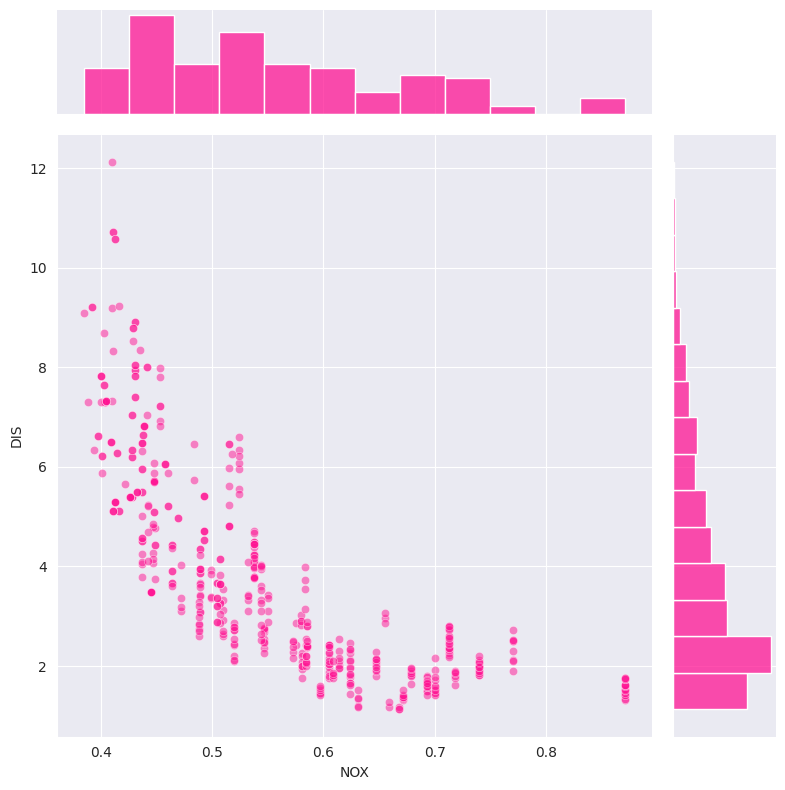

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df.NOX, 
              y=df.DIS,
              height=8, 
              kind='scatter',
              color='deeppink',  
              joint_kws={'alpha':0.5})
plt.show()

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

Compareing INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution). Does pollution go up or down as there is a higher proportion of industry?

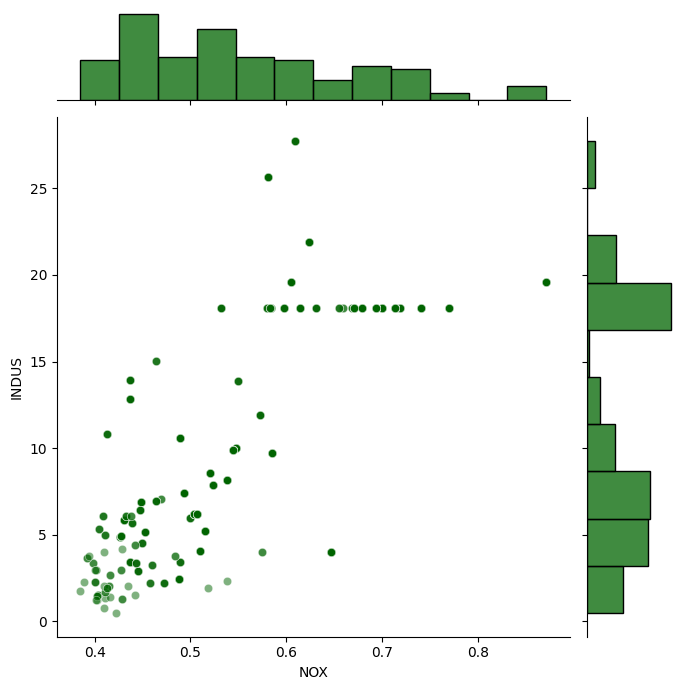

In [ ]:
sns.jointplot(x=df.NOX, 
              y=df.INDUS,
              height=7, 
              color='darkgreen',
              joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms

Compare LSTAT (proportion of lower-income population) with RM (number of rooms). How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

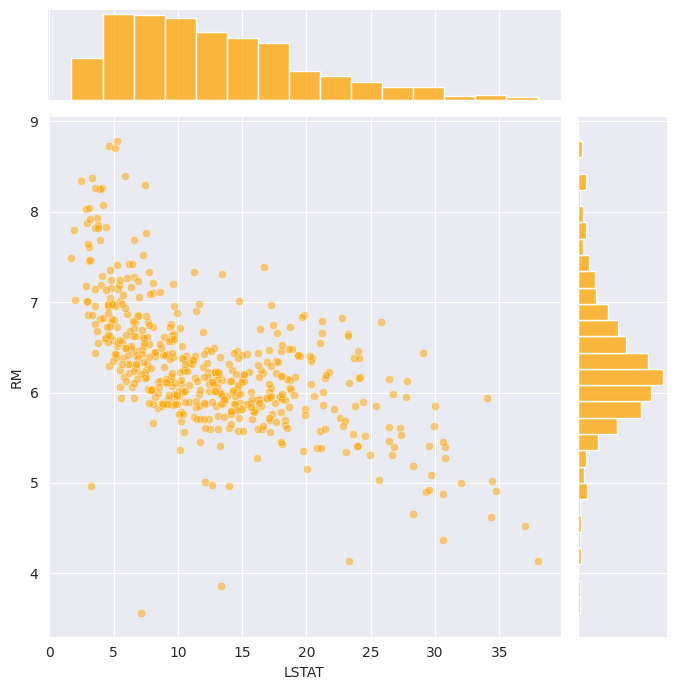

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df.LSTAT, 
                y=df.RM,
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population versus Home Price

Compare LSTAT with PRICE. How does the proportion of the lower-income population in an area affect home prices?

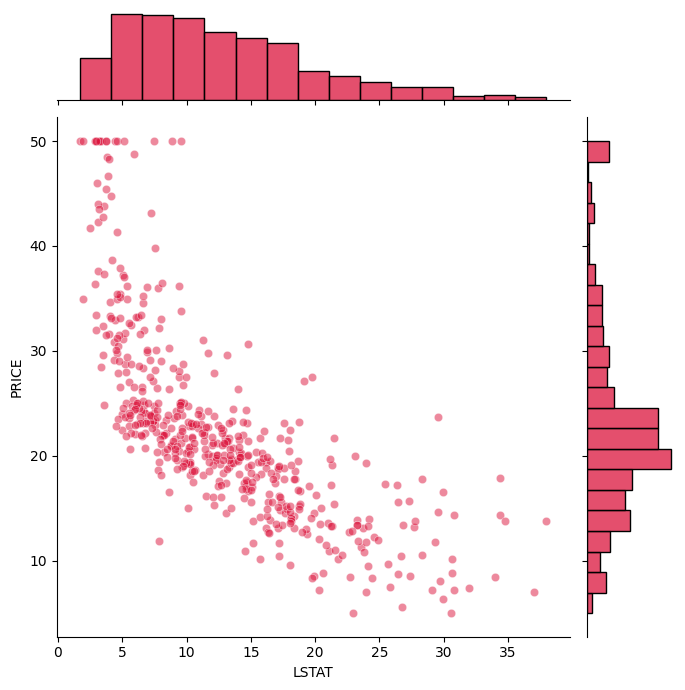

In [ ]:
sns.jointplot(x=df.LSTAT, 
              y=df.PRICE,
              height=7, 
              color='crimson',
              joint_kws={'alpha':0.5})
plt.show()

#### Number of Rooms versus Home Value

Compare RM (number of rooms) with PRICE. We can calculate how the number of rooms affects home prices. 😊 

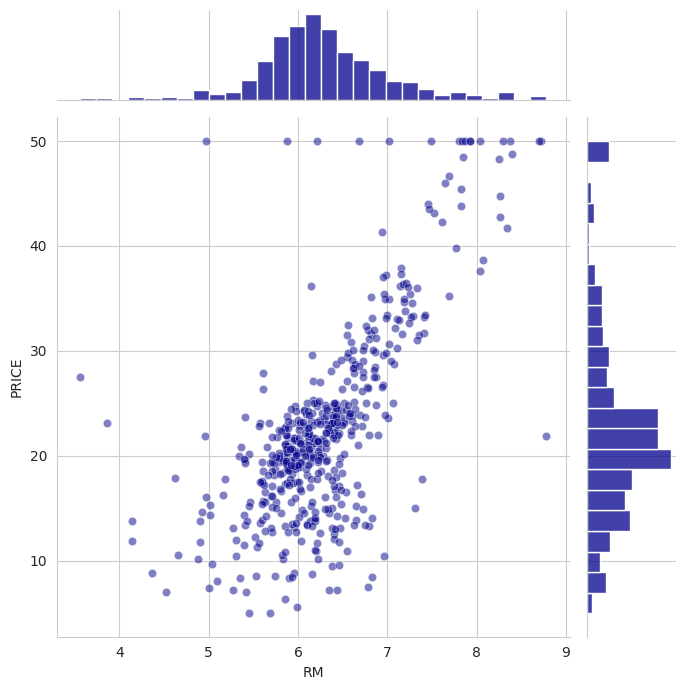

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=df.RM, 
               y=df.PRICE,
               height=7, 
               color='darkblue',
               joint_kws={'alpha':0.5})
plt.show()

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 

* Creating 4 subsets: X_train, X_test, y_train, y_test
* Spliting the training and testing data roughly 80/20.  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('PRICE', axis=1), 
                                                    df.PRICE,
                                                    test_size=0.2, 
                                                    random_state=10)

train_pct = (len(X_train)*100) / len(df.drop('PRICE', axis=1))
print(f'Training data: {train_pct:.3}%')

test_pct = (X_test.shape[0]*100) / df.drop('PRICE', axis=1).shape[0]
print(f'Testing data: {test_pct:.3}%')

Training data: 79.8%
Testing data: 20.2%


# Multivariable Regression

Our Linear Regression is a multi-variable regression as it has more than one features to predict. The model has the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your Regression

Run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [ ]:
r1 = LinearRegression()
r1.fit(X_train, y_train)
rsq = r1.score(X_train, y_train)

print(f'Regression 1 intercep value is{r1.intercept_}')
print(f'Regression 1 coefficeints values are:{r1.coef_}')
print(f'Rsquared value is {rsq:.2}')

Regression 1 intercep value is36.53305138282431
Regression 1 coefficeints values are:[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
Rsquared value is 0.75


### Evaluating the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Printing out the coefficients (the thetas in the equation above) for the features. 


In [ ]:
r1_coefficient = pd.DataFrame(data=r1.coef_, index=X_train.columns, columns=['Coefficient'])
r1_coefficient

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [ ]:
extra_per_room = r1_coefficient.loc['RM'].values[0] * 1000  
print(f'Extra per room is {extra_per_room:.5}$')

Extra per room is 3108.5$


### Analysing the Estimated Values & Regression Residuals

How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

The first plot should be actual values (`y_train`) against the predicted value values: 

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices.  




In [ ]:
predict_value = r1.predict(X_train)
residual = (y_train - predict_value)

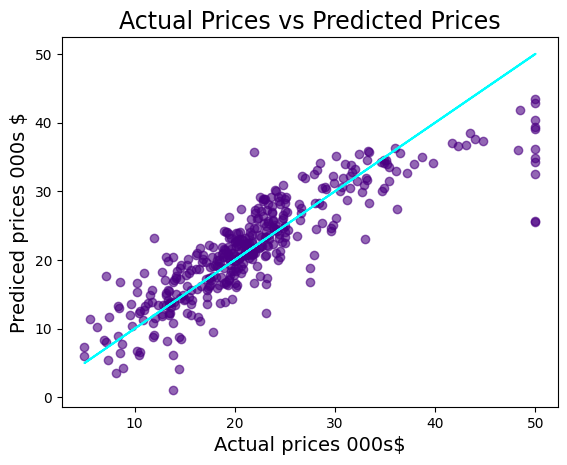

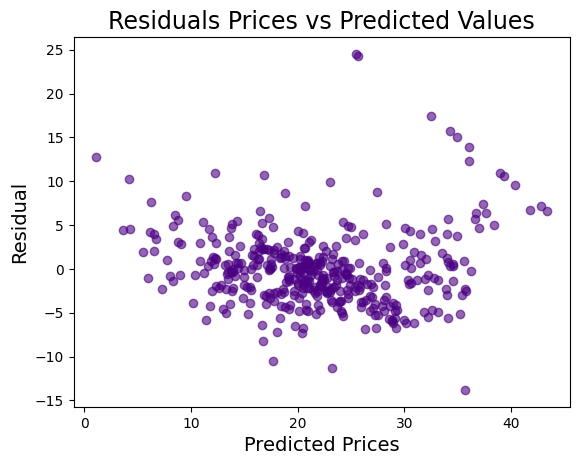

In [ ]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_value, color='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual Prices vs Predicted Prices', fontsize=17)
plt.xlabel('Actual prices 000s$', fontsize=14)
plt.ylabel('Prediced prices 000s $', fontsize=14)
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predict_value, y=residual, c='indigo', alpha=0.6)
plt.title('Residuals Prices vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>


* Calculating the mean and the skewness of the residuals. 
* Is the skewness different from zero? If so, by how much? 
* Is the mean different from zero?

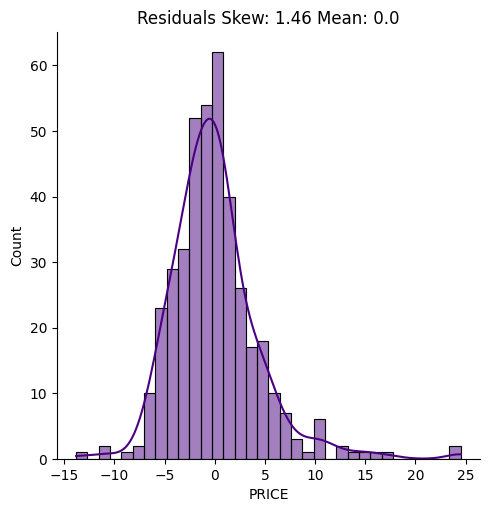

In [ ]:
residual_mean = round(residual.mean(), 2)
residual_skew = round(residual.skew(), 2)
sns.displot(residual,
            kde=True,
            color='indigo')
plt.title(f'Residuals Skew: {residual_skew} Mean: {residual_mean}')
plt.show()

We see that the residuals have a skewness of 1.46. There could be some room for improvement here.  

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 


If the target `data['PRICE']` could be a suitable candidate for a log transformation. 

* Calculate the skew of that distribution.
* Which distribution has a skew that's closer to zero? 


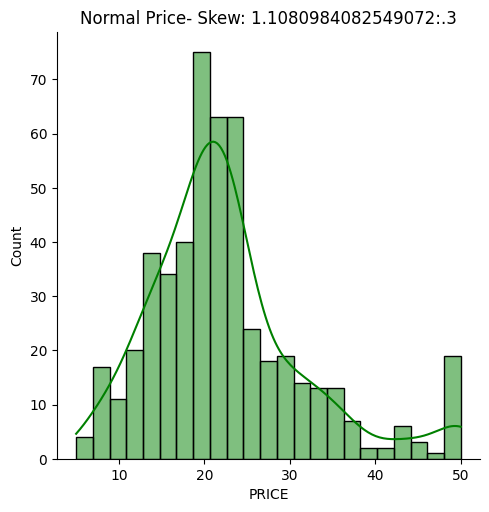

In [ ]:
tgt_skew = df.PRICE.skew()
sns.displot(df.PRICE, kde='kde', color='green')
plt.title(f'Normal Price- Skew: {tgt_skew}:.3')
plt.show()

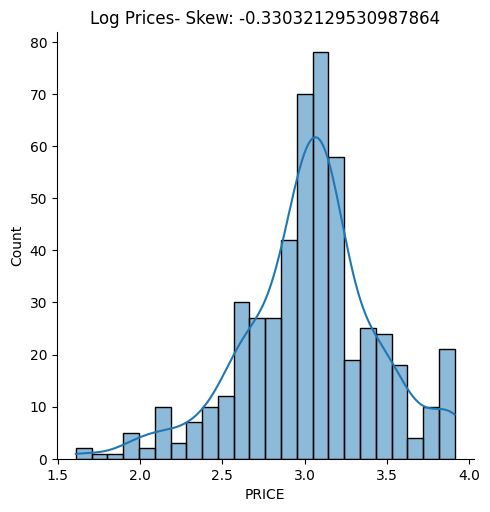

In [ ]:
y_log = np.log(df.PRICE)
sns.displot(y_log, kde=True)
plt.title(f'Log Prices- Skew: {y_log.skew():3}')
plt.show()

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices. 

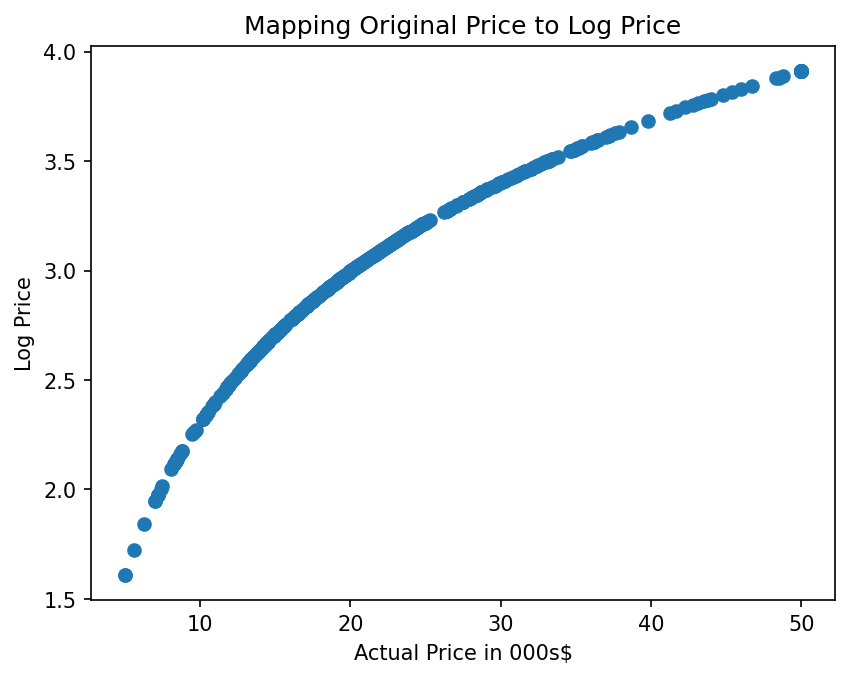

In [ ]:
plt.figure(dpi=150)
plt.scatter(df.PRICE, np.log(df.PRICE))
plt.title('Mapping Original Price to Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual Price in 000s$')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

* Running a second regression, but this time use the transformed target data. 
* What is the r-squared of the regression on the training data? 
* Have we improved the fit of our model compared to before based on this measure?


In [ ]:
X_train, X_test, log_y_train, log_y_test = train_test_split(df.drop('PRICE', axis=1), 
                                                    np.log(df.PRICE), 
                                                    test_size=0.2, 
                                                    random_state=10)

log_reg = LinearRegression()
log_reg.fit(X_train, log_y_train)
log_rsq = log_reg.score(X_train, log_y_train)

log_predict = log_reg.predict(X_train)
log_residual = (log_y_train - log_predict)

print(f'Training data r-squared: {log_rsq:.2}')

Training data r-squared: 0.79


This time we got an r-squared of 0.79 compared to 0.75. This looks like a promising improvement. 

## Evaluating Coefficients with Log Prices

* Do the coefficients still have the expected sign? 
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher? 


In [ ]:
df_log_coef = pd.DataFrame(data=log_reg.coef_, index=X_train.columns, columns=['coef'])
df_log_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots

* Adding 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side. 
*We are using `indigo` as the colour for the original regression and `navy` for the color using log prices.

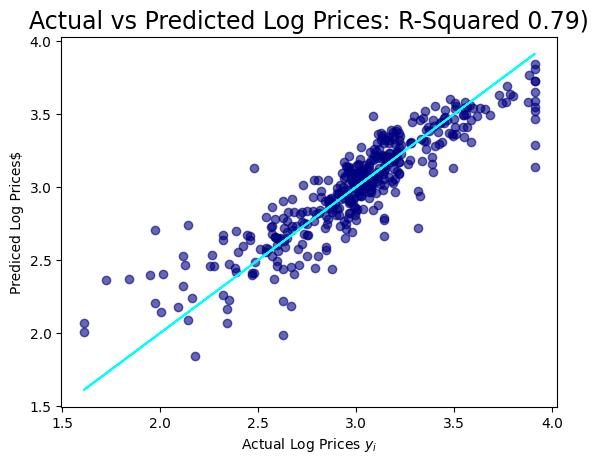

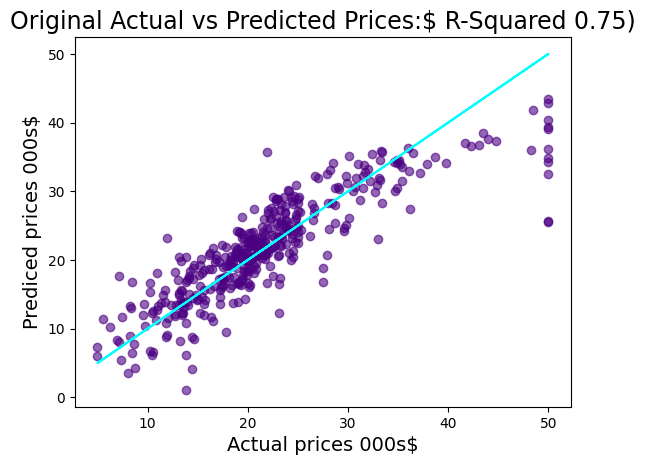

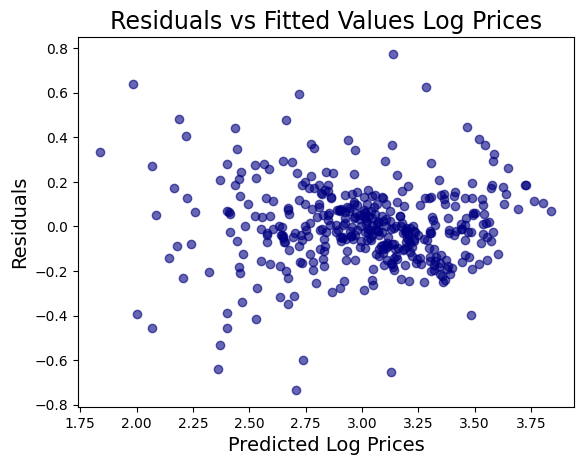

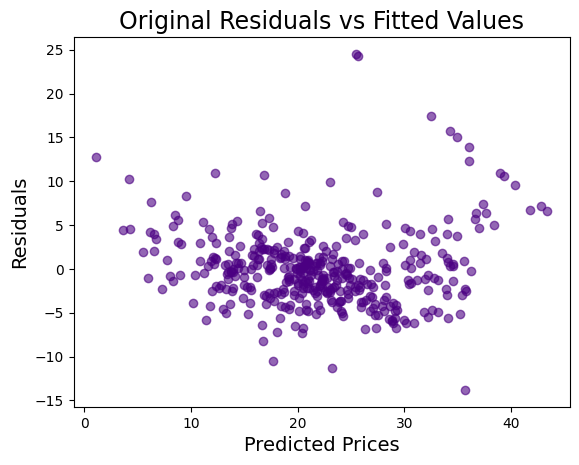

In [ ]:
plt.scatter(x=log_y_train, y=log_predict,c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: R-Squared {log_rsq:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$')
plt.ylabel('Prediced Log Prices$')
plt.show()

plt.scatter(x=y_train, y=predict_value, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices:$ R-Squared {rsq:.3})', fontsize=17)
plt.xlabel('Actual prices 000s$', fontsize=14)
plt.ylabel('Prediced prices 000s$', fontsize=14)
plt.show()

plt.scatter(x=log_predict, y=log_residual, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

plt.scatter(x=predict_value, y=residual, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



Calculating the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

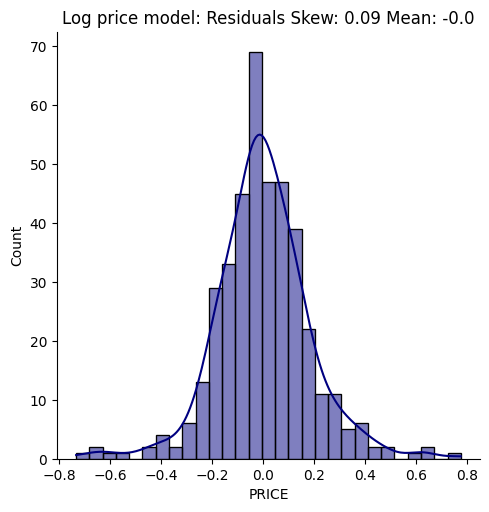

NameError: ignored

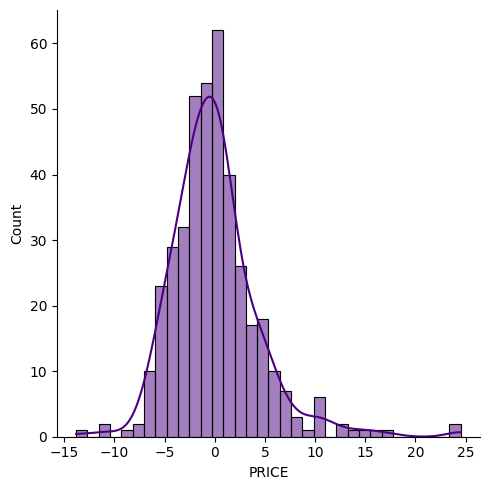

In [ ]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residual.mean(), 2)
log_resid_skew = round(log_residual.skew(), 2)

sns.displot(log_residual, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew: {log_resid_skew} Mean: {log_resid_mean}')
plt.show()

sns.displot(residual, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({residual_skew}) Mean ({residual_mean})')
plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation. 

# Comparing Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

Comparing the r-squared of the two models on the test dataset to answer these questions:
* Which model does better? 
* Is the r-squared higher or lower than for the training dataset? Why?

In [ ]:
print(f'Original Model Test Data r-squared: {r1.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_reg.score(X_test, log_y_test):.2}')  

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [ ]:
# Starting Point: Average Values in the Dataset
average_vals = df.drop(['PRICE'], axis=1).mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(df.drop(['PRICE'], axis=1).columns)), 
                              columns=df.drop(['PRICE'], axis=1).columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65



* Predicting how much the average property is worth using the stats above. 
* What is the log price estimate and what is the dollar estimate?  

In [ ]:
log_estimate = log_reg.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')
dollar = np.exp(log_estimate) * 1000
print(f'The property price estimate: ${dollar:.6}')

The log price estimate is $3.03
The property price estimate: $20703.2



Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = df.NOX.quantile(q=0.75) # high
amount_of_poverty =  df.LSTAT.quantile(q=0.25) # low

In [ ]:

property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
# Make prediction
log_estimate = log_reg.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.250065369440925
The property is estimated to be worth $25792.0
